<h1>精度を向上させるためのディープラーニングのアーキテクチャーの紹介</h1>

ResNetなどのディープラーニングのアーキテクチャーの紹介と、SEモジュールという少ないメモリ使用量にも関わらず精度が向上する手法について紹介します。

<b>この記事の図やソースコードは非営利の勉強会のために使わせていただいております。</b><br>
<b>The Figure and source code on this notebook are used for non-profit pourpose.</b>

<h2> 引用・参考文献 </h2>
[1] http://image-net.org/challenges/talks/ilsvrc2015_deep_residual_learning_kaiminghe.pdf
[2] "Figure 2. Residual learning: a building block.",https://arxiv.org/pdf/1512.03385.pdf

In [2]:
!pip install tensorflow
!pip install keras

tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/49/8f13fa215e10a7ab0731cc95b0e9bb66cf83c6a98260b154cfbd0b55fb19/scipy-1.3.0-cp35-cp35m-manylinux1_x86_64.whl
tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


通常の畳込みネットワークで層を積み上げると精度が落ちる。CIFAR-10の画像を分類するタスクにおいて、20層の通常の畳込みニューラルネットワーク(CNN)を用いた時のテスト時のエラーは10%。 56層にすると14%とエラー率が拡大すると資料[1]では述べられている。

そこで、考案された手法がResNet。

ResNetはSkip Connectionという手法を用いて勾配消失を防ぐことができる。ResNetの構成要素であるResBlockは以下の図[2]のようになっている。
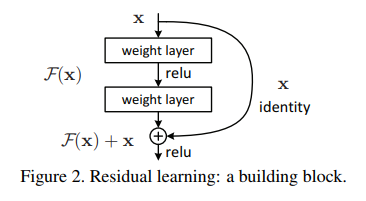
また、推論時にもニューラルネットワークは画像などの入力データの細部の情報と抽象的な情報両方を考慮することができる。

通常のCNNを用いると全ての情報が抽象化されてしまい、細部の情報が分からなくなってしまうが、その点をResNet,UNetなどはクリアー。
上の図は、ネットワークを関数として捉えた場合の、イメージ図。出力であるH(x) = F(x)+x となっている。xはそのブロックの入力値で、通常は中間層の特徴量マップや生画像が入る場合が多い。ResBlockの左側の流れは、線形変換を複数回繰り返すので、複雑な関数の形F(x)になる。右側のxは入力をそのまま出力層に渡すようになっており、あえて述べるなら係数が1.0、つまり1.0倍の変換をしていることになる。誤差逆伝搬法を用いる際に、右側の流れに関しては微分しても勾配の傾きが1.0になるので、勾配が消失しづらくなる。（注意：勾配が消失するというのは、傾きが0.00000.....001のようにほとんど無くなるということ）

ResNetが残差学習と呼ばれる理由は、F(x)=H(x)-xとなっており、入力xと出力H(x)がとても近くて残差（つまり引き算した結果）が0に近い場合でも、左側の重みは0に近くなり、右側の流れでそのまま渡すことで微妙な差をうまく学習することができる。

ResBlockの最終層でマージしているが、それは右側と左側から流れてきた全く同じサイズの特徴量マップ同士を、まったく同じ位置同士で足し合わせることを表現している。（×マークの時はアダマール積。要はCNN。最終層などで特徴量マップをマージする方法は、同じ位置どうしの足し算か、concatenateのどちらかが多い。)

<b>3rd partyのソースコードは　https://qiita.com/_odasi_/items/2d441e46643f73c0ca19　を参照。</b>
ただし、Kerasで実装したいときは数行で定義できる便利なものが標準で定義されている。

## どうでもいいTips 1:
CNNのフィルタの重みを正則化することができる方法がある。使い方は以下の通り。

```python
from keras.layers import Conv2D
from keras.regularizers import l2

def ResNetConv2D(*args, **kwargs):
    conv_kwargs = {
            'strides': (1, 1),
            'padding': 'same',
            'kernel_initializer': 'he_normal',
            'kernel_regularizer': l2(1.e-4)
    }
    conv_kwargs.update(kwargs)

    return Conv2D(*args, **conv_kwargs)

ResNetConv2D(filters=64, kernel_size=(7, 7), strides=(2, 2))
```

## どうでもいいTips2:
キーボードのアットマークとshiftキーを同時に押すと、クオーテーションマークを出すことができる。最初のクォーテーションマークの後にpythonと書き、その後ろにコードを書くとマークダウンの中にコードを書ける。
例：

\`\`\`python print("テスト") \`\`\`

```python 
print("テスト") 
```

エスケープシーケンスは円マークで書けます。